In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("Student_Performance.csv")

In [3]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


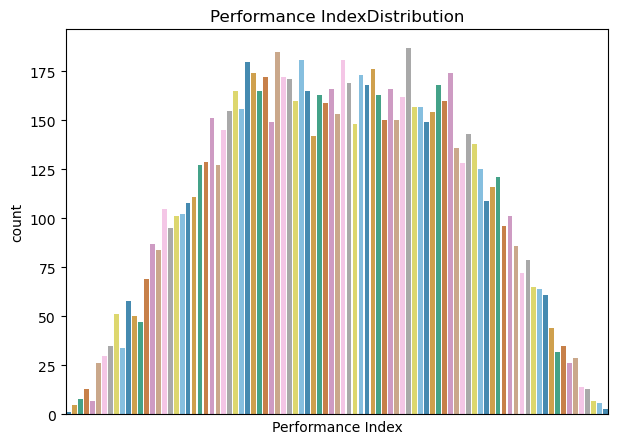

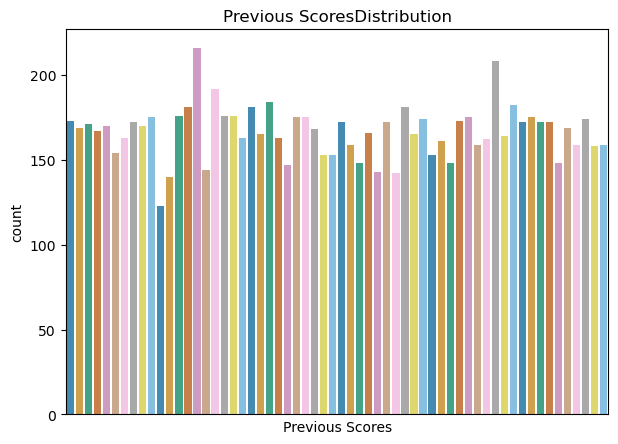

In [5]:
columns = df[['Performance Index','Previous Scores']]
for column in columns:
    plt.figure(figsize = (7,5))
    sns.countplot(x=column ,data = df,palette="colorblind",alpha=0.8)
    plt.xticks([])
    plt.title(f'{column}Distribution')
    plt.show()

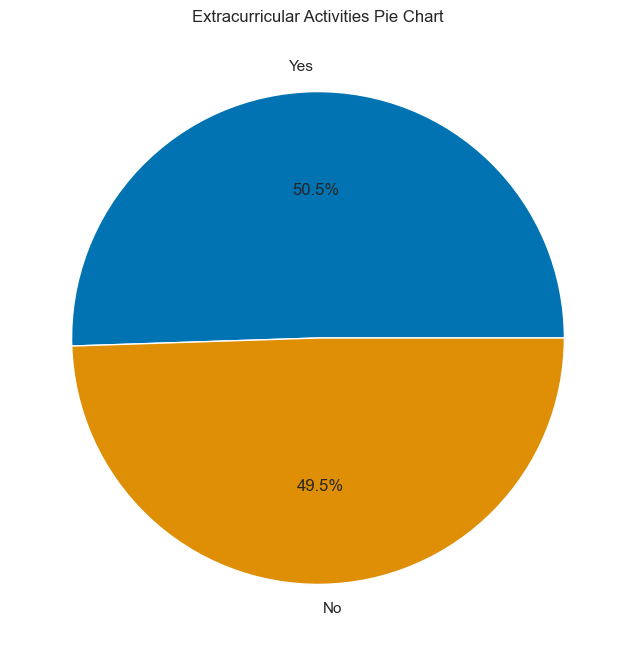

In [6]:
plt.figure(figsize=(8, 8))
sns.set_theme()  
palette = sns.color_palette("colorblind")  
sns.set_palette(palette)
plt.pie(df["Extracurricular Activities"].value_counts(), labels=df["Extracurricular Activities"].unique(), autopct='%1.1f%%')
plt.title('Extracurricular Activities Pie Chart')
plt.show()

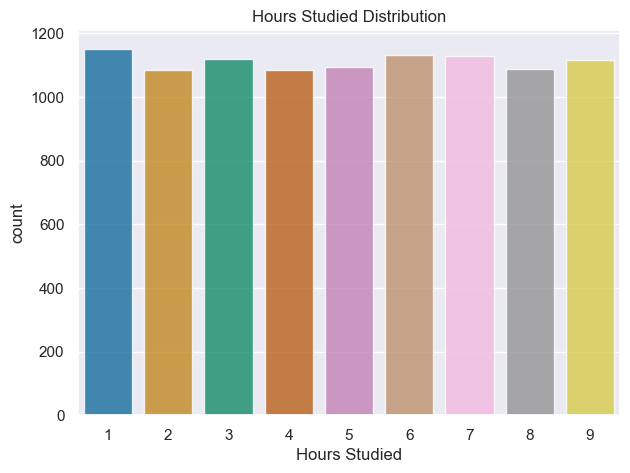

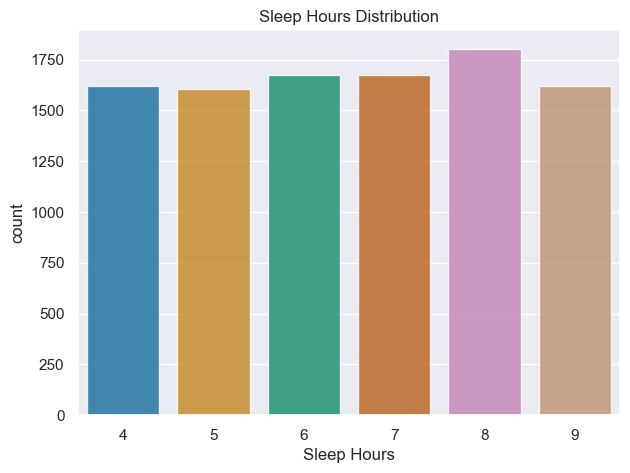

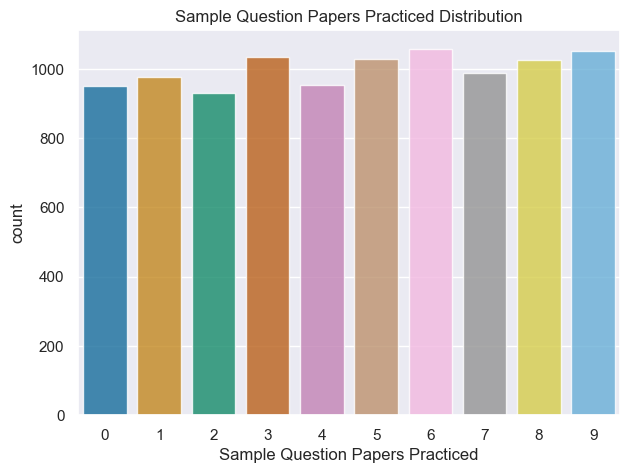

In [7]:
columns = df[["Hours Studied","Sleep Hours","Sample Question Papers Practiced"]]

for column in columns:
    plt.figure(figsize=(7, 5))
    sns.countplot(x=column, data=df, palette="colorblind", alpha=0.8)
    plt.xticks()
    plt.title(f'{column} Distribution')
    plt.show()

In [8]:
X1 = df[["Previous Scores", "Hours Studied", "Sleep Hours", "Sample Question Papers Practiced"]]
y1 = df["Performance Index"]

In [9]:
from sklearn.model_selection import train_test_split
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size = 0.3,random_state=1)
model = LinearRegression()
fit = model.fit(X1_train,y1_train)
predict = model.predict(X1_test)

In [10]:
print('R score :', fit.score(X1_train,y1_train))

R score : 0.9886536189042422


In [11]:
pd.DataFrame({"Actutal Performance": y1_test,'predicted performance': predict})

,Actutal Performance,predicted performance
9953,58.0,61.459424
3850,64.0,63.484278
4962,75.0,77.426216
3886,59.0,63.745583
5437,86.0,86.084785
...,...,...
5273,51.0,45.379910
8014,32.0,31.410850
8984,87.0,86.080867
6498,68.0,63.217435


In [12]:
X1 = df[["Previous Scores", "Hours Studied", "Sleep Hours", "Sample Question Papers Practiced"]]
y1 = df["Performance Index"]

In [13]:
predictedindex = model.predict([[85, 6, 7, 5]])

print("The predicted academic index for a student with previous test scores of 85, who studied for 6 hours, slept for 7 hours, and took 5 pages of practice was",predictedindex,".")

The predicted academic index for a student with previous test scores of 85, who studied for 6 hours, slept for 7 hours, and took 5 pages of practice was [74.25785304] .


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [24]:
Hours_Studied = np.array([7,4,8,5,7])
Performance_Index = np.array([91.0,65.0,45.0,36.0,66.0])
def calculate_coeff(X,y):
    n = np.size(X)
    X_mean = np.mean(X)
    Y_mean = np.mean(y)
    
    # Summinsion of the ceoefficient 
    Y_sum = np.sum(Performance_Index*Hours_Studied) - n*Y_mean*X_mean
    X_sum = np.sum(Hours_Studied*Hours_Studied) - n*X_mean*X_mean
    
    # find slope and intercept 
    slope = X_sum/Y_sum
    intercept = Y_mean - slope*X_mean
    return slope, intercept
# funcion for making prediction 
def predict(slope,X,intercept):
    return slope*X+intercept

slope,intercept = calculate_coeff(Hours_Studied,Performance_Index)
print(f"Slope: {slope}, Intercept: {intercept}")


y_pred = predict(slope,Hours_Studied,intercept)
r2pred = predict(Hours_Studied,Performance_Index,intercept)

ran = predict(slope,Performance_Index,intercept)

for_r2 = np.array([694.31764706, 317.31764706, 417.31764706, 237.31764706,519.31764706])

mean_of_actual = np.mean(Performance_Index)

r2 = np.sum((Performance_Index-mean_of_actual)**2)
lower_val = np.sum((Performance_Index-for_r2)**2)
summission = 1-(r2/lower_val)
print(summission)
ran

Slope: 0.529411764705885, Intercept: 57.31764705882351
0.9977579780730927


array([105.49411765,  91.72941176,  81.14117647,  76.37647059,
        92.25882353])

In [25]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
